In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [261]:
df= pd.read_csv(r"C:\Users\adity\911.csv")

In [262]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
289235,40.024967,-75.282905,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB; ...,NaN,EMS: VEHICLE ACCIDENT,2017-12-30 11:11:36,LOWER MERION,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB,1
289236,40.024967,-75.282905,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB; ...,NaN,Fire: VEHICLE ACCIDENT,2017-12-30 11:11:30,LOWER MERION,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB,1
289237,40.107918,-75.163347,EDGE HILL RD & LIMEKILN PIKE; ABINGTON; 2017-1...,19038.0,Traffic: VEHICLE ACCIDENT -,2017-12-30 11:15:24,ABINGTON,EDGE HILL RD & LIMEKILN PIKE,1
289238,40.061921,-75.117655,COVENTRY AVE & NEW SECOND ST; CHELTENHAM; 2017...,19027.0,Traffic: DISABLED VEHICLE -,2017-12-30 11:12:03,CHELTENHAM,COVENTRY AVE & NEW SECOND ST,1


In [263]:
#shape of the data
df.shape

(289240, 9)

In [264]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [265]:
#description of the data
df.describe()

,lat,lng,zip,e
count,289240.000000,289240.000000,253942.000000,289240.0
mean,40.159149,-75.316496,19235.103413,1.0
std,0.088823,0.160315,304.051163,0.0
min,30.333596,-95.595595,17555.000000,1.0
25%,40.099904,-75.392320,19038.000000,1.0
50%,40.144223,-75.304587,19401.000000,1.0
75%,40.229008,-75.211038,19446.000000,1.0
max,41.167156,-74.813670,77316.000000,1.0


In [266]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          35298
title            0
timeStamp        0
twp            103
addr             0
e                0
dtype: int64

In [267]:
##filling null values
df["zip"].fillna(df.zip.mode()[0],inplace=True)
df["twp"].fillna(df.twp.mode()[0],inplace=True)

In [268]:
#checking for the null values
df.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

In [269]:
##droping columns that we did not require in doing eda
df.drop(columns=["lat","lng","e"],axis=1,inplace=True)

In [270]:
df

,desc,zip,title,timeStamp,twp,addr
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END
...,...,...,...,...,...,...
289235,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB; ...,19401.0,EMS: VEHICLE ACCIDENT,2017-12-30 11:11:36,LOWER MERION,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB
289236,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB; ...,19401.0,Fire: VEHICLE ACCIDENT,2017-12-30 11:11:30,LOWER MERION,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB
289237,EDGE HILL RD & LIMEKILN PIKE; ABINGTON; 2017-1...,19038.0,Traffic: VEHICLE ACCIDENT -,2017-12-30 11:15:24,ABINGTON,EDGE HILL RD & LIMEKILN PIKE
289238,COVENTRY AVE & NEW SECOND ST; CHELTENHAM; 2017...,19027.0,Traffic: DISABLED VEHICLE -,2017-12-30 11:12:03,CHELTENHAM,COVENTRY AVE & NEW SECOND ST


In [271]:
df.zip.unique()

array([19525., 19446., 19401., 19044., 19426., 19438., 19462., 19428.,
       19040., 19027., 18936., 18974., 19031., 19403., 19422., 19085.,
       18964., 19038., 19406., 19468., 19010., 19095., 19464., 19444.,
       19041., 19440., 19405., 19002., 19096., 19454., 19465., 19004.,
       19066., 19072., 18041., 19046., 19090., 19012., 19025., 19473.,
       18073., 18969., 18074., 19460., 19001., 18054., 19009., 19006.,
       19035., 19150., 19075., 19034., 19151., 19453., 19003., 18914.,
       19512., 18976., 19120., 18915., 18076., 19477., 19087., 18966.,
       19131., 19128., 19083., 19053., 19475., 18960., 19504., 18070.,
       19492., 18932., 19118., 18092., 19490., 19518., 18056., 19119.,
       19107., 17752., 19111., 18927., 19435., 18951., 19472., 19503.,
       19126., 19505., 19423., 19138., 36107., 18036., 19116., 19139.,
       19129., 19115., 19355., 77316., 19457., 19082., 19127., 19443.,
       17555., 19520., 19063., 19020., 19404., 19382., 19474., 19057.,
      

In [272]:
##we will convert zipcode into int ..
df["zip"] = df["zip"].astype(int)

In [273]:
df["zip"].dtype

dtype('int32')

What are the top 5 zipcodes for 911 calls?

In [275]:
top5zip =df["zip"].value_counts().head(5)

In [276]:
top5zip

zip
19401    55119
19464    19276
19403    14524
19446    13939
19406     9601
Name: count, dtype: int64

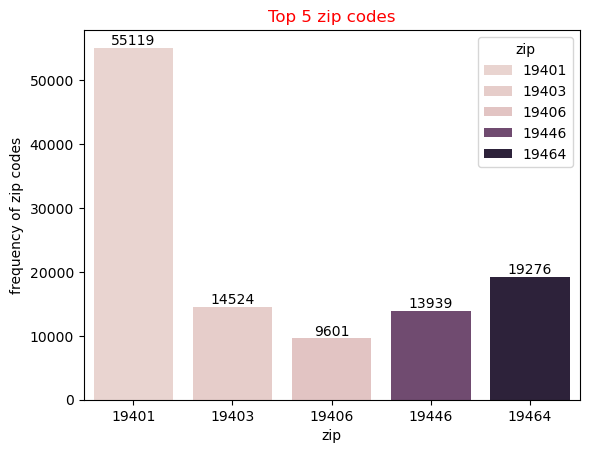

In [277]:
ni = sns.barplot(x=top5zip.index,y=top5zip.values,hue=top5zip.index)
plt.ylabel("frequency of zip codes")
plt.title("Top 5 zip codes",color="red")
for i in ni.containers:
    plt.bar_label(i)
plt.show()

What are the top 5 townships (twp) for 911 calls?

In [279]:
top5town = df.twp.value_counts().head(5)

In [280]:
top5town

twp
LOWER MERION    24929
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: count, dtype: int64

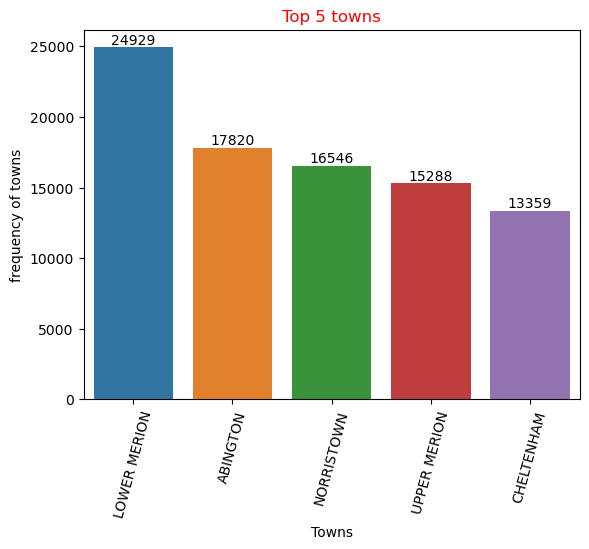

In [281]:
mi = sns.barplot(x=top5town.index,y=top5town.values,hue=top5town.index)
plt.ylabel("frequency of towns")
plt.title("Top 5 towns",color="red")
plt.xlabel("Towns")
plt.xticks(rotation=75)
for i in mi.containers:
    plt.bar_label(i)
plt.show()

For example, if the title column value is EMS: BACK PAINS/INJURY ,
the Reason column value would be EMS.
What is the most common Reason for a 911 call based off of this new column?

In [283]:
df.head(4)

,desc,zip,title,timeStamp,twp,addr
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST


In [284]:
df["Reason"] = df["title"].str.split(":").str[0]

In [285]:
df.head()

,desc,zip,title,timeStamp,twp,addr,Reason
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS


In [286]:
# the most common Reason for a 911 call based off of this new column?
df["Reason"].value_counts()

Reason
EMS        144362
Traffic    101889
Fire        42989
Name: count, dtype: int64

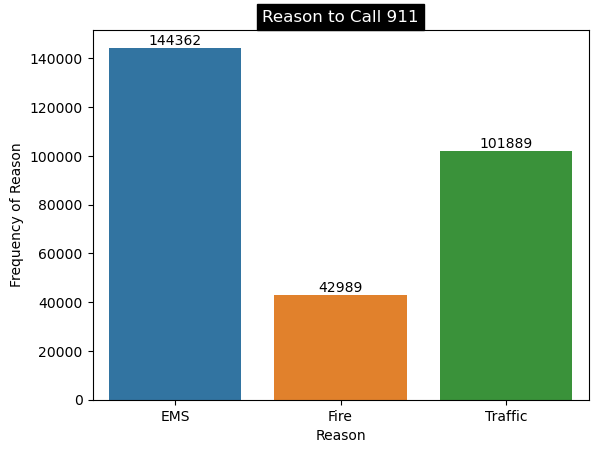

In [287]:
ki = sns.countplot(x="Reason",data=df,hue="Reason")
plt.ylabel("Frequency of Reason")
plt.title("Reason to Call 911",color="white",backgroundcolor="black")
for i in ki.containers:
    plt.bar_label(i)
plt.show()

In [288]:
## the most common reason is Emergency with 1444362 counts in data.

Use pd.to_datetime to convert the column from strings to DateTime objects.create new columns data,month,year..

In [290]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [291]:
df.dtypes

desc                 object
zip                   int32
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
Reason               object
dtype: object

In [292]:
df["year"] = df["timeStamp"].dt.year
df["month"] = df["timeStamp"].dt.month
df["day"] = df["timeStamp"].dt.dayofweek

In [293]:
df

,desc,zip,title,timeStamp,twp,addr,Reason,year,month,day
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,2015,12,3
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,2015,12,3
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,2015,12,3
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,2015,12,3
4,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,2015,12,3
...,...,...,...,...,...,...,...,...,...,...
289235,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB; ...,19401,EMS: VEHICLE ACCIDENT,2017-12-30 11:11:36,LOWER MERION,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB,EMS,2017,12,5
289236,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB; ...,19401,Fire: VEHICLE ACCIDENT,2017-12-30 11:11:30,LOWER MERION,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB,Fire,2017,12,5
289237,EDGE HILL RD & LIMEKILN PIKE; ABINGTON; 2017-1...,19038,Traffic: VEHICLE ACCIDENT -,2017-12-30 11:15:24,ABINGTON,EDGE HILL RD & LIMEKILN PIKE,Traffic,2017,12,5
289238,COVENTRY AVE & NEW SECOND ST; CHELTENHAM; 2017...,19027,Traffic: DISABLED VEHICLE -,2017-12-30 11:12:03,CHELTENHAM,COVENTRY AVE & NEW SECOND ST,Traffic,2017,12,5


In [294]:
df["day"] = df["day"].replace({0:"monday",1:"tuesday",2:"wednesday",3:"thrusday",4:"friday",5:"saturday",6:"sunday"})

In [295]:
df.head()

,desc,zip,title,timeStamp,twp,addr,Reason,year,month,day
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,2015,12,thrusday
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,2015,12,thrusday
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,2015,12,thrusday
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,2015,12,thrusday
4,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,2015,12,thrusday


In [329]:
df["month"] = df["month"].replace({1:"january",2:"febrary",3:"march",4:"april",5:"may",6:"june",7:"july",8:"august",9:"september",
                                   10:"october",11:"november",12:"december"})

In [331]:
df.head(5)

,desc,zip,title,timeStamp,twp,addr,Reason,year,month,day
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,2015,december,thrusday
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,2015,december,thrusday
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,2015,december,thrusday
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,2015,december,thrusday
4,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,2015,december,thrusday


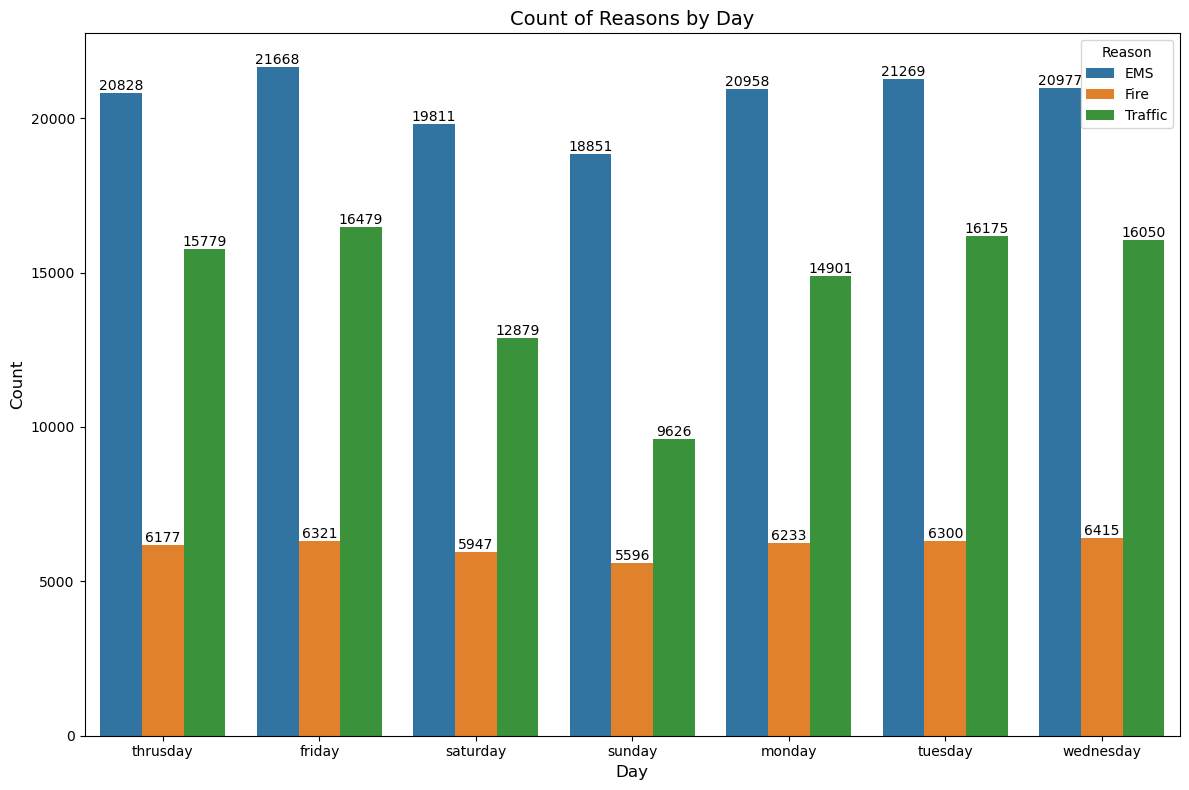

In [343]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x="day", data=df, hue="Reason")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.legend(title="Reason", loc="upper right")
plt.title("Count of Reasons by Day", fontsize=14)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

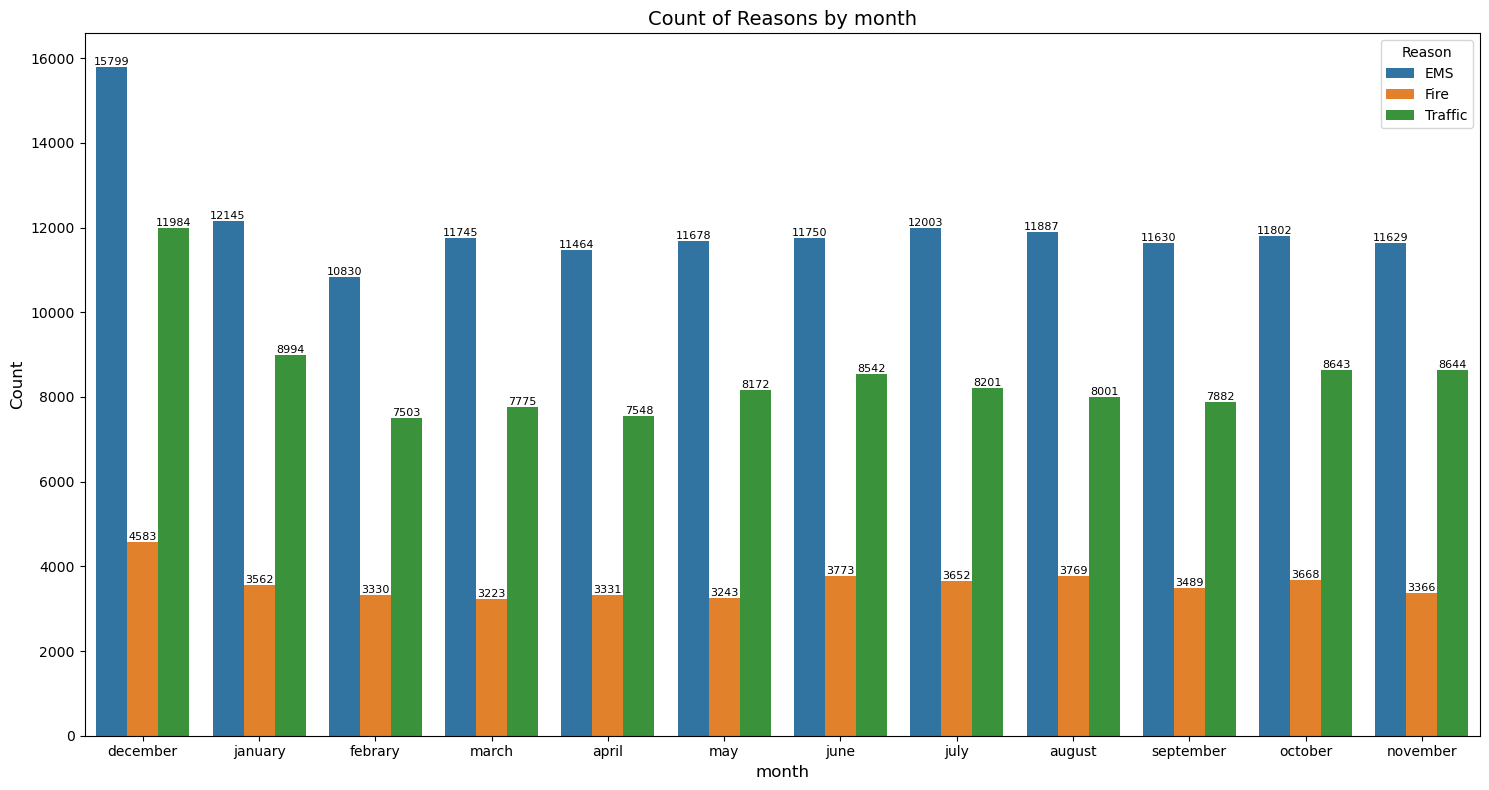

In [349]:
plt.figure(figsize=(15, 8))

ax1 = sns.countplot(x="month", data=df, hue="Reason")

for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

plt.legend(title="Reason", loc="upper right")
plt.title("Count of Reasons by month", fontsize=14)
plt.xlabel("month", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [351]:
df.head()

,desc,zip,title,timeStamp,twp,addr,Reason,year,month,day
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,2015,december,thrusday
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,2015,december,thrusday
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,2015,december,thrusday
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,2015,december,thrusday
4,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,2015,december,thrusday


In [357]:
top5add=df["addr"].value_counts().head(5)

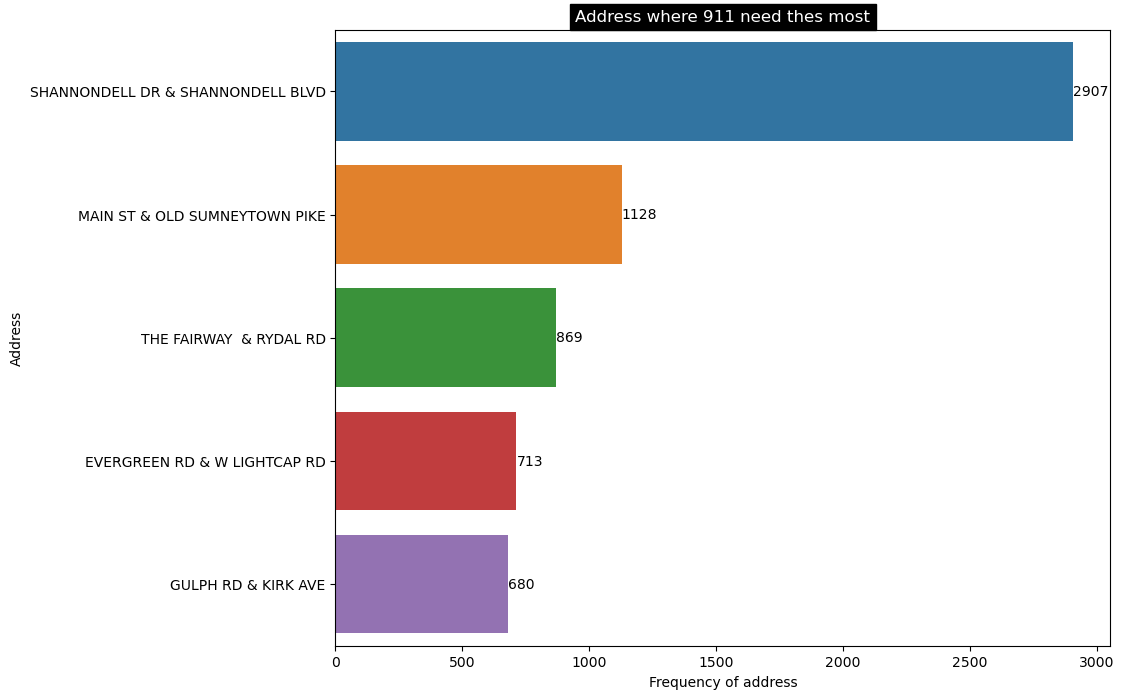

In [371]:
plt.figure(figsize=(10,8))
ki = sns.barplot(y=top5add.index,x=top5add.values,hue = top5add.index)
plt.xlabel("Frequency of address")
plt.ylabel("Address")
plt.title("Address where 911 need thes most",color="white",backgroundcolor="black")
for i in ki.containers:
    plt.bar_label(i)
plt.show()

In [373]:
df.head(3)

,desc,zip,title,timeStamp,twp,addr,Reason,year,month,day
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,2015,december,thrusday
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,2015,december,thrusday
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,2015,december,thrusday


which year 911 get most calls

In [376]:
mostcall_year =df["year"].value_counts()

In [378]:
mostcall_year

year
2016    142360
2017    138964
2015      7916
Name: count, dtype: int64

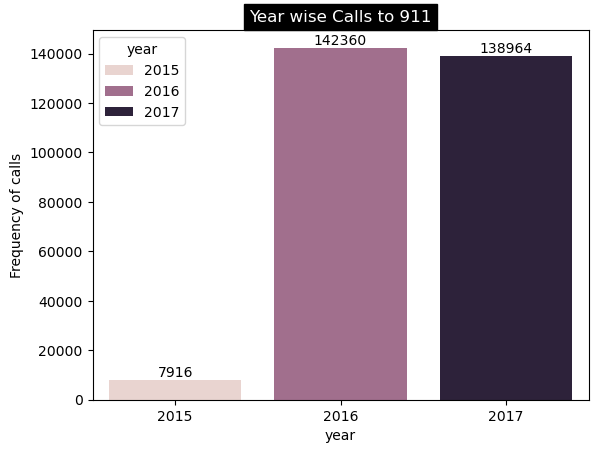

In [380]:
ki = sns.countplot(x="year",data=df,hue="year")
plt.ylabel("Frequency of calls")
plt.title("Year wise Calls to 911",color="white",backgroundcolor="black")
for i in ki.containers:
    plt.bar_label(i)
plt.show()

In [382]:
##2016 year was the highest to call 911.